# 📈 Análise de Desempenho e Estratégias no Varejo


## Definição do Problema


A empresa enfrenta desafios significativos que comprometem sua sustentabilidade e crescimento futuro, evidenciados por produtos com prejuízo, queda nas vendas de eletrônicos e eletroportáteis, e uma redução acentuada nas vendas em 2014. Essas questões podem indicar falhas na gestão de margens de lucro, na estratégia de preços e nas abordagens de marketing, além de uma possível desconexão com as tendências do mercado e condições econômicas.


## Objetivo

O objetivo deste projeto é realizar uma análise detalhada dos dados da empresa para identificar as causas subjacentes dos problemas mencionados. Através da reavaliação da estrutura de custos, e revisão das estratégias de marketing.

## Importação de bibliotecas

In [60]:
#visualização de dados.
import matplotlib.pyplot as plt

#Manipulação e analise de dados.
import pandas as pd
import numpy as np

#Avisos 
import warnings
# Suprimir todos os warnings
warnings.filterwarnings('ignore')


## Carregando Dataframe

In [61]:
#Carregando dataframe.
df= pd.read_excel("dados_comerciais.xlsx")

## Funções

In [62]:
#Criando função para trocar os tipos de colunas
def converter_tipo(df, cols, tipo):
    for col in cols:
        if col in df.columns:
            df[col] = df[col].astype(tipo)
        else:
            raise ValueError(f"A coluna '{col}' não existe no DataFrame.")
    return df

In [63]:
#Criando função para padrozinação de cores
def get_color(variable):
    # Definindo a paleta de cores para cada variável
    paleta_cores = {
        'Produto': '#9edae5',      # Azul
        'Categoria': '#ff7f0e',    # Laranja
        'Segmento': '#2ca02c',     # Verde
        'Fabricante': '#f7b6d2',   # Vermelho
        'Loja': '#9467bd',         # Roxo
        'Cidade': '#8c564b',       # Marrom          
        'Estado': '#e377c2',       # Rosa   
        'Vendedor': '#7f7f7f',     # Cinza
        'ID-Vendedor': '#bcbd22',  # Amarelo
        'Data Venda': '#17becf',   # Ciano
        'ValorVenda': '#d62728',   # Rosa Claro
        'Custo': '#1f77b4'         # Azul Claro
    }
    
    # Retorna a cor correspondente à variável
    return paleta_cores.get(variable, '#000000')  # Cor padrão (preto) se a variável não for encontrada

## Analise Exploratória

In [64]:
#Cinco primeiras linhas
df.head()

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00,345
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00,712
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00,390
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32,200
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89,234


In [65]:
#Colunas
df.columns

Index(['ID-Produto', 'Produto', 'Categoria', 'Segmento', 'Fabricante', 'Loja',
       'Cidade', 'Estado', 'Vendedor', 'ID-Vendedor', 'Data Venda',
       'ValorVenda', 'Custo'],
      dtype='object')

In [66]:
#Número de linhas e colunas
df.shape

(457, 13)

### Verificando quantidade de linhas e colunas, tamanho dos arquivos e os tipos de dados inteiros(int), decimais(float64), data(datetime64), etc...).

In [67]:
#Dtype, linhas, colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID-Produto   457 non-null    object        
 1   Produto      457 non-null    object        
 2   Categoria    457 non-null    object        
 3   Segmento     457 non-null    object        
 4   Fabricante   457 non-null    object        
 5   Loja         457 non-null    object        
 6   Cidade       457 non-null    object        
 7   Estado       457 non-null    object        
 8   Vendedor     457 non-null    object        
 9   ID-Vendedor  457 non-null    int64         
 10  Data Venda   457 non-null    datetime64[ns]
 11  ValorVenda   457 non-null    float64       
 12  Custo        457 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 46.5+ KB


### Criando coluna de Margem de lucro em busca em busca de Insights.A margem de lucro serve para a empresa garantir se mantenha viável no longo prazo. Ela é fundamental na hora de formar o preço de venda do produto e deve balancear os custos de produção.

In [68]:
#Nova coluna
df["margem_lucro(%)"] = (df["ValorVenda"] - df["Custo"]) / df["ValorVenda"] * 100

### Irei transformar o "custo" em valor decimal(float64). Isso simplificará a manipulação dos dados, considerando que estamos trabalhando com valores monetários.

In [69]:
#aplicando a função
df = converter_tipo(df, ['Custo'], float)

# Checando se reconheceu como float
print(df["Custo"].dtype)

float64


In [70]:
# Primeiro registro de vendas
inicio = df['Data Venda'].min().strftime('%d/%m/%Y')
print(f'Primeiro registro de vendas foi em {inicio}')

# Último registro de vendas
termino = df['Data Venda'].dt.date.max().strftime('%d/%m/%Y')
print(f'A última venda foi em {termino}')

Primeiro registro de vendas foi em 01/01/2012
A última venda foi em 02/12/2015


### Como podemos ver abaixo temos um desvio padrão muito alto na coluna de lucro e valor venda. Também temos um número negativo em "Lucro", duas situações que merecem uma atenção maior...

In [71]:
#Função describe.
df[["ValorVenda","Custo", "margem_lucro(%)"]].describe().round(2)

,ValorVenda,Custo,margem_lucro(%)
count,457.00,457.00,457.00
mean,786.23,132.75,60.44
std,754.38,83.52,55.75
min,12.00,90.00,-900.00
25%,167.00,120.00,28.14
50%,671.00,120.00,78.84
75%,1230.00,120.00,90.24
max,3999.00,800.00,97.00


In [72]:
#Indentificando números de prejuízos.
df["margem_lucro(%)"][lambda x: x< 0]

433   -900.0
Name: margem_lucro(%), dtype: float64

## Mais informações sobre o produto que deu prejuízo 

In [73]:
#Podendo indentificar o produto, fabricante, a loja, o vendedor, etc...Com função lambda.
df.apply(lambda row: row["Custo"] - row["ValorVenda"], axis=1)
prejuizos = df[df["margem_lucro(%)"] < 0]
print(prejuizos)

      ID-Produto     Produto        Categoria   Segmento Fabricante   Loja  \
433  SKU-0000434  Ventilador  Eletroportáteis  Doméstico    Samsung  R1297   

         Cidade          Estado       Vendedor  ID-Vendedor Data Venda  \
433  Petrópolis  Rio de Janeiro  Artur Moreira         1004 2015-08-02   

     ValorVenda  Custo  margem_lucro(%)  
433        12.0  120.0           -900.0  


### A margem de lucro está totalmente desbalanceada, confirmando o que a descrição das estatísticas já tinha revelado.

In [74]:
#Agrupando produto por valorvenda e margem de lucro
df.groupby("Produto").agg({"margem_lucro(%)": "mean", "ValorVenda": "mean"}).reset_index().sort_values(by="margem_lucro(%)", ascending=False).round(2)


,Produto,margem_lucro(%),ValorVenda
16,Samsung Galaxy 8,96.79,3867.75
14,Notebook Dell 8 GB,90.63,1282.35
13,Morotola Moto G5,90.12,1218.62
0,Ar Condicionado,89.22,1217.17
3,Desktop HP 16 GB,89.02,1210.50
2,Desktop 32 GB,86.31,972.41
18,Sony Experia XA,82.83,699.00
6,Geladeira Duplex,82.69,1094.38
10,Lavadora 11 Kg,80.64,819.36
17,Secadora Vapor,77.14,664.68


### Com o gráfico de caixa, podemos ter uma análise mais profunda e com facil interpretação, visualização de dispersão, comparação de grupos e possíveis identificação de outliers.
 ### Abaixo no gráfico de caixas podemos verificar que o custo de alguns produtos estão altos e desbalanceados. Uma indetificação mais preocupante ainda é que tem um ou mais produto abaixo da linha de zero em "Lucro".

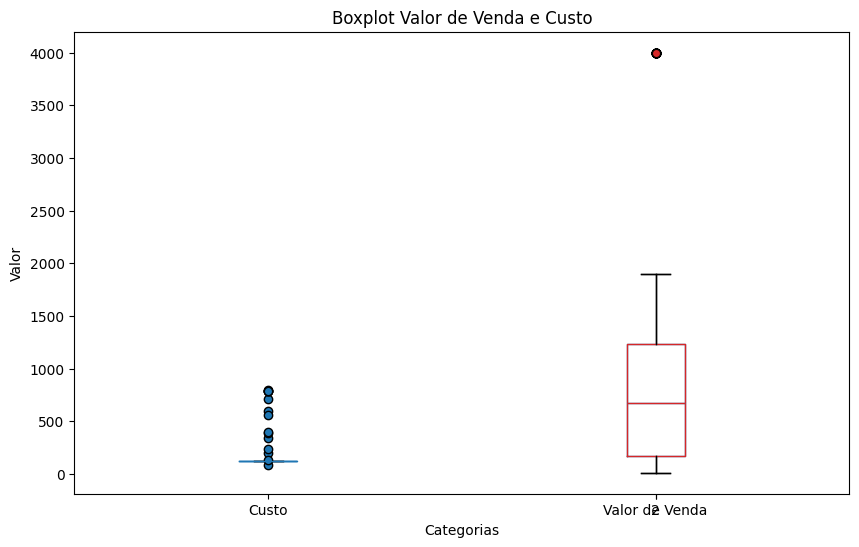

In [75]:
#Plotando gráfico
plt.figure(figsize=(10, 6))

plt.boxplot([df['Custo'], df['ValorVenda']], 
            labels=['Custo', 'Valor de Venda'],
            # Usando a função para a cor de Custo
            boxprops={'color': get_color('Custo')},  
            flierprops={'markerfacecolor': get_color('Custo'), 'marker': 'o'},
            medianprops={'color': get_color('Custo')})

plt.boxplot([df['ValorVenda']], positions=[2], 
            # Usando a função para a cor de ValorVenda
            boxprops={'color': get_color('ValorVenda')},  
            flierprops={'markerfacecolor': get_color('ValorVenda'), 'marker': 'o'},
            medianprops={'color': get_color('ValorVenda')})

# Atualizando o layout do gráfico
plt.title('Boxplot Valor de Venda e Custo')
plt.ylabel('Valor')
plt.xlabel('Categorias')

# Exibindo o gráfico
plt.show()

### Abaixo podemos analisar que é apenas um produto cujo preço é mais alto em comparação aos outros produtos.

In [76]:
## Calcular novanta porcento
acima= df['ValorVenda'].quantile(0.95)

# Filtrar produtos com ValorVenda acima de 95%
produtos_acima = df[df['ValorVenda'] > acima][['Produto', 'ValorVenda']]

# Quantidade de anomalias
quantidade_anomalias = produtos_acima.shape[0]

# Exibir resultados
print("Produtos com ValorVenda acima de 90%:")
print(produtos_acima)
print("\nQuantidade de possíveis anomalias:", quantidade_anomalias)

Produtos com ValorVenda acima de 90%:
              Produto  ValorVenda
11   Geladeira Duplex      1651.0
62   Desktop HP 16 GB      1788.0
90    Ar Condicionado      1399.0
139  Samsung Galaxy 8      1899.0
147  Samsung Galaxy 8      3999.0
150  Samsung Galaxy 8      3999.0
154  Samsung Galaxy 8      3999.0
156  Samsung Galaxy 8      3999.0
157  Samsung Galaxy 8      3999.0
158  Samsung Galaxy 8      3999.0
159  Samsung Galaxy 8      3999.0
166  Geladeira Duplex      1567.0
169  Samsung Galaxy 8      3999.0
170  Samsung Galaxy 8      3999.0
171  Samsung Galaxy 8      3999.0
172  Samsung Galaxy 8      3999.0
173  Samsung Galaxy 8      3999.0
174  Samsung Galaxy 8      3999.0
175  Samsung Galaxy 8      3999.0
176  Samsung Galaxy 8      3999.0
183  Geladeira Duplex      1579.0
188  Geladeira Duplex      1899.0
400   Ar Condicionado      1390.0

Quantidade de possíveis anomalias: 23


### Vendas de produtos por categoria

In [102]:
#Quantidade de vendas por Categoria
df["Categoria"].value_counts()

Categoria
Eletrodomésticos    226
Eletroportáteis     124
Eletrônicos          60
Celulares            47
Name: count, dtype: int64

### Vendas de produtos por fabricante

In [103]:
#Quantidade de vendas por fabricante
df["Fabricante"].value_counts()

Fabricante
Brastemp      90
Consul        82
Samsung       74
Britânia      61
Motorola      29
HP            29
LG            27
Panasonic     26
Epson         12
Dell          10
Sony          10
Electrolux     7
Name: count, dtype: int64

### A média dos preços de celulares ao longo dos anos diminuíram ano a ano. Eletrônicos também caíram as médias dos valores, mas com uma queda de maior relevância.

In [104]:
#Agrupamento por ano, categoria e valor média de venda por produto.
df.groupby(["Ano","Categoria"])["ValorVenda"].mean().reset_index().sort_values(by = "ValorVenda",  ascending = False).round(2)

,Ano,Categoria,ValorVenda
3,2013,Celulares,2649.00
7,2014,Celulares,2614.50
10,2015,Celulares,1911.94
2,2012,Eletrônicos,1246.47
4,2013,Eletrodomésticos,887.66
11,2015,Eletrodomésticos,876.29
1,2012,Eletrodomésticos,841.04
6,2013,Eletrônicos,812.89
8,2014,Eletrodomésticos,769.86
0,2012,Celulares,679.00


### Preço total de venda por categoria, em ordem decrescente para melhor comparação.

In [107]:
#Agrupamento por ano, categoria e valor total de venda.
df.groupby(["Ano","Categoria"])["ValorVenda",].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).round(2)

,Ano,Categoria,ValorVenda
11,2015,Eletrodomésticos,77989.88
10,2015,Celulares,61182.00
4,2013,Eletrodomésticos,60361.13
8,2014,Eletrodomésticos,33104.02
7,2014,Celulares,26145.00
1,2012,Eletrodomésticos,21867.08
6,2013,Eletrônicos,19509.43
2,2012,Eletrônicos,14957.66
13,2015,Eletrônicos,13862.46
12,2015,Eletroportáteis,12030.45


### Com a análise, podemos notar que a categoria de celulares foi a que mais cresceu, atingindo um aumento de 8.910,60%.

In [108]:
#Calculando porcentagem de crescimento de vendas totai em celulares.
celulares=(61182-679) /679*100
print("Aumento percentual de: {:.2f}%".format(celulares))

Aumento percentual de: 8910.60%


### Já os eletrodomésticos tiveram uma queda em 2014 de 45,15%, levando em consideração o ano de 2013.

In [ ]:
#Calculando a porcentagem de declínio nas vendas totais em eletrodomesticos
eletrodomesticos=(33.10402-60.36113) /60.36113*100
print("Diminuição percetual de: {:.2f}%".format(eletrodomesticos))

### As sete lojas com melhores desempenhos em vendas da empresa.

In [110]:
#Ordenando com agrupamento.
df.groupby("Loja")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).head(7)

,Loja,ValorVenda
11,SP8822,87888.88
5,R1296,50843.66
4,R1295,48905.90
10,SP8821,39292.99
12,SP8823,35903.69
0,A9990,28282.87
13,V7654,24803.77


### As sete lojas com piores desempenhos em vendas da empresa.

In [111]:
#Ordenando com agrupamento.
df.groupby("Loja")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).tail(7)

,Loja,ValorVenda
8,S6543,12621.00
1,A9991,10016.00
2,B7659,7998.00
7,R1298,5031.00
9,SA7761,2940.00
6,R1297,2515.45
3,P0761,2265.90


### Quantidades de vendas anuais por cidade.

In [109]:
#Agrupando por ano e cidade para o valor venda.
df.groupby(["Ano", "Cidade"])["ValorVenda"].sum()

Ano   Cidade        
2012  Belo Horizonte     5445.87
      Rio de Janeiro     5025.89
      São Paulo         23874.21
      Vitória            3157.77
2013  Belo Horizonte    16610.00
      Cascavel           1263.90
      Rio de Janeiro     3860.00
      Salvador           2698.00
      São Paulo         56009.66
      Vitória           12977.00
2014  Belo Horizonte     2599.00
      Campos              149.00
      Petrópolis          614.00
      Rio de Janeiro    27469.90
      São Paulo         32023.12
      Vitória             467.00
2015  Belo Horizonte    13644.00
      Campinas           7998.00
      Campos             4882.00
      Cascavel           1002.00
      Osasco            12621.00
      Petrópolis         1901.45
      Rio de Janeiro    63393.77
      Salvador            242.00
      São Paulo         51178.57
      Vitória            8202.00
Name: ValorVenda, dtype: float64

### Produtos mais vendidos

In [112]:
df["Produto"].value_counts()

Produto
Geladeira Duplex            110
Aspirador                    61
Micro-Ondas                  56
Impressora Deskjet           36
Morotola Moto G5             29
Ventilador                   22
Fritadeira                   20
Lavadora 11 Kg               16
Samsung Galaxy 8             16
Processador de Alimentos     13
Ar Condicionado              12
Secadora Vapor               12
Forno-Micro-Ondas            11
Notebook Dell 8 GB           10
Desktop 32 GB                10
Grill                         9
Liquidificador                8
Desktop HP 16 GB              4
LG K10 TV Power               1
Sony Experia XA               1
Name: count, dtype: int64

### Verificando se haverá necessidade de uma etapa de limpeza de dados 

In [99]:
df.isnull().sum()

ID-Produto         0
Produto            0
Categoria          0
Segmento           0
Fabricante         0
Loja               0
Cidade             0
Estado             0
Vendedor           0
ID-Vendedor        0
Data Venda         0
ValorVenda         0
Custo              0
margem_lucro(%)    0
Ano                0
Mes                0
dtype: int64

In [100]:
# Verificar duplicatas
duplicatas = df.duplicated()
print(f"Número de duplicatas: {duplicatas.sum()}")

# Remover duplicatas
df_no_duplicates = df.drop_duplicates()

Número de duplicatas: 0


## Visualização de Dados

### Agora vamos examinar como estão as percentagens de lucro e custo.

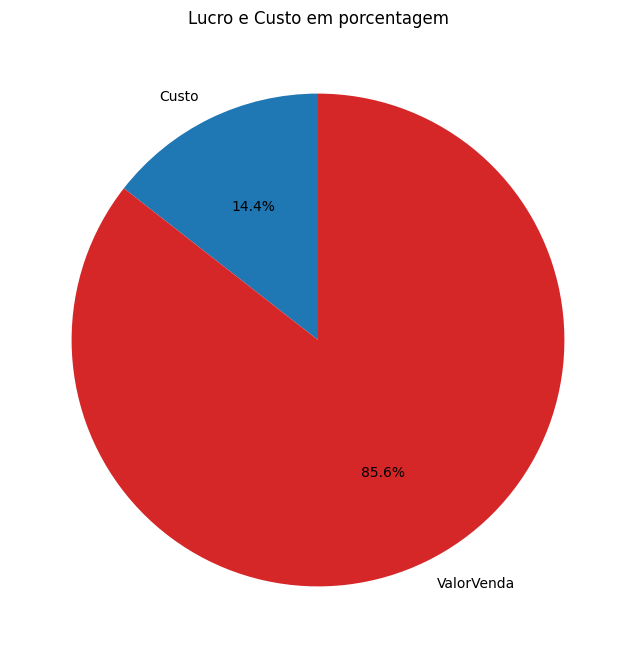

In [79]:
# Total de Valor venda, custo e lucro.
totaldevendas = df[["Custo", "ValorVenda"]].sum()

# Tamanho da figura.
plt.figure(figsize=(12, 8))

# Definindo as cores usando a função get_color
cores = [get_color('Custo'), get_color('ValorVenda')]

# Gráfico de pizza, labels, dados em porcentagem, ângulo e cores.
plt.pie(totaldevendas, labels=totaldevendas.index, autopct='%1.1f%%', startangle=90, colors=cores)

# Título.
plt.title("Lucro e Custo em porcentagem")

# Mostra o gráfico.
plt.show()

### Análise de Tendências Temporais

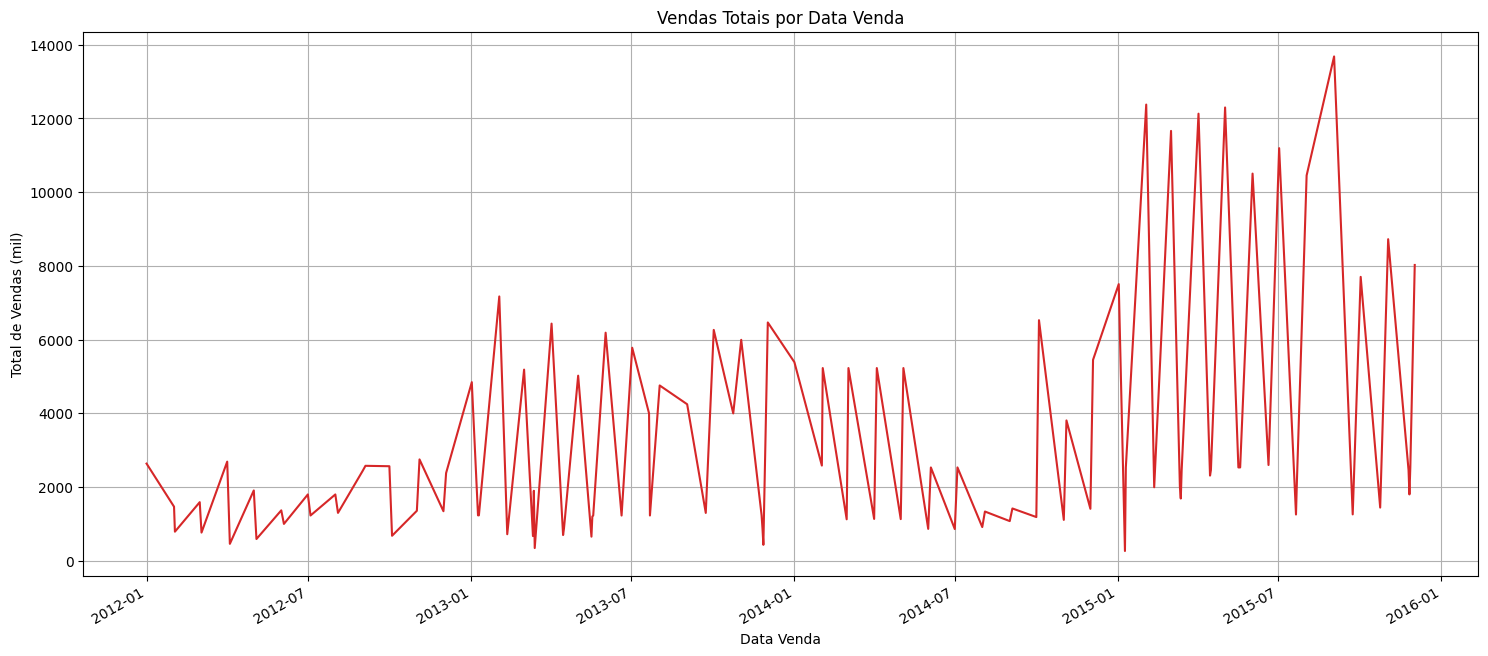

In [80]:
# DataFrame.
datavenda = df.groupby(["Data Venda"])["ValorVenda"].sum()

# Tamanho do gráfico.
plt.figure(figsize=(18, 8))

# Gráfico de linhas com cor definida pela função get_color
datavenda.plot(color=get_color('ValorVenda'))

# Labels.
plt.xlabel("Data Venda")
plt.ylabel("Total de Vendas (mil)")
plt.title("Vendas Totais por Data Venda")

# Grade.
plt.grid(True)

# Mostrar gráfico
plt.show()


### Verifique como não ficou tão bom visualmente, destacando a impotância para uma análise por ano e mês. Irei criar uma coluna com os anos e os meses separados de "data de venda".

In [101]:
#Elaborando uma coluna para o ano e o meses. 
df["Ano"] = df["Data Venda"].dt.year
df["Mes"] = df["Data Venda"].dt.month

### Podemos notar abaixo que tivemos uma baixa do ano 2013 para 2014 e uma boa recuperação em 2015.

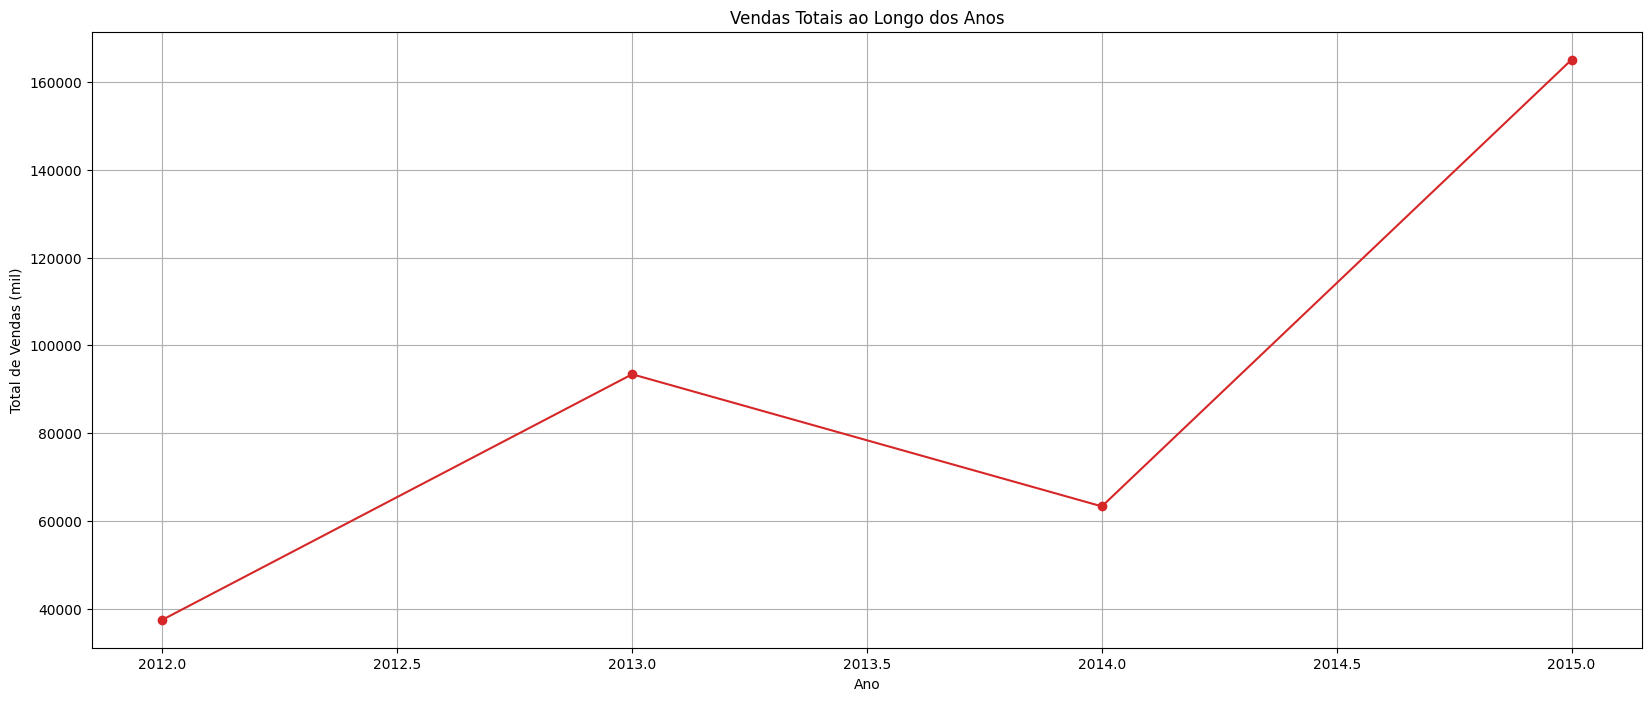

In [83]:
# DataFrame
ano = df.groupby(["Ano"])["ValorVenda"].sum()

# Tamanho do gráfico
plt.figure(figsize=(20, 8))

# Gráfico de linhas com cor definida pela função get_color
ano.plot(marker='o', color=get_color('ValorVenda'))

# Labels
plt.xlabel("Ano")
plt.ylabel("Total de Vendas (mil)")
plt.title("Vendas Totais ao Longo dos Anos")

# Grade
plt.grid(True)

# Mostrar gráfico
plt.show()


### Não foram registradas vendas de eletrônicos e ouve uma queda da categoria com maior desempenho(Eletrodomésticos). Principalmente por esses fatores houve uma baixa em 2014, como podemos análisar no gráfico abaixo.

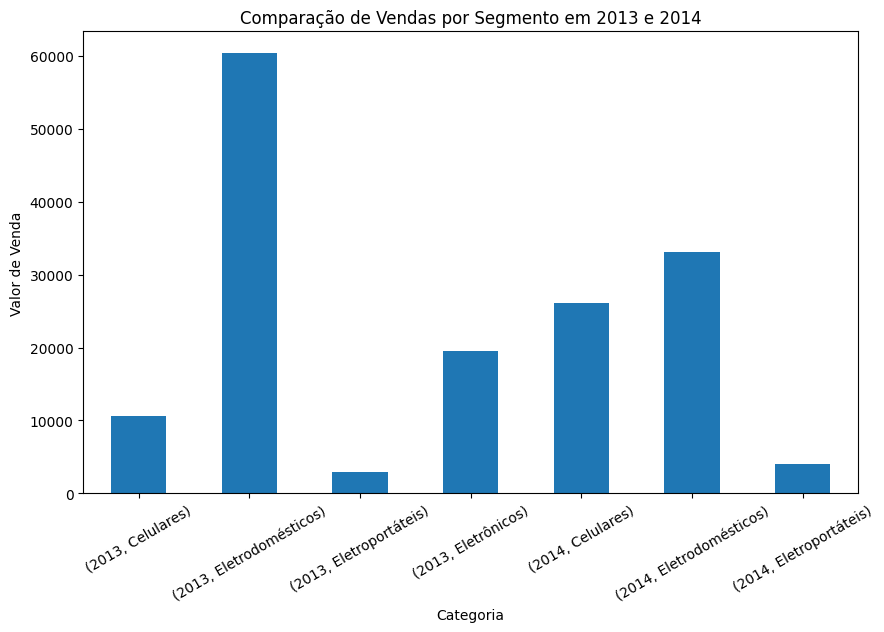

In [86]:
# Filtrando o DataFrame para os anos de 2013 e 2014
df_2013_2014 = df[df['Ano'].isin([2013, 2014])]

# Agrupando os dados por Ano e Categoria e somando os valores de Venda
resultado = df_2013_2014.groupby(["Ano", "Categoria"])["ValorVenda"].sum()

# Criando o gráfico de barras
resultado.plot(kind='bar', figsize=(10, 6))

# Definindo o título do gráfico
plt.title("Comparação de Vendas por Segmento em 2013 e 2014")

# Definindo o rótulo do eixo X
plt.xlabel("Categoria")

# Definindo o rótulo do eixo Y
plt.ylabel("Valor de Venda")

# Ajustando a rotação dos rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=30)

# Exibindo o gráfico
plt.show()


### Podemos observar que as vendas entre março e maio teve um bom desempenho, já agosto e dezembro as vendas preocupam. Uma queda preocupante.

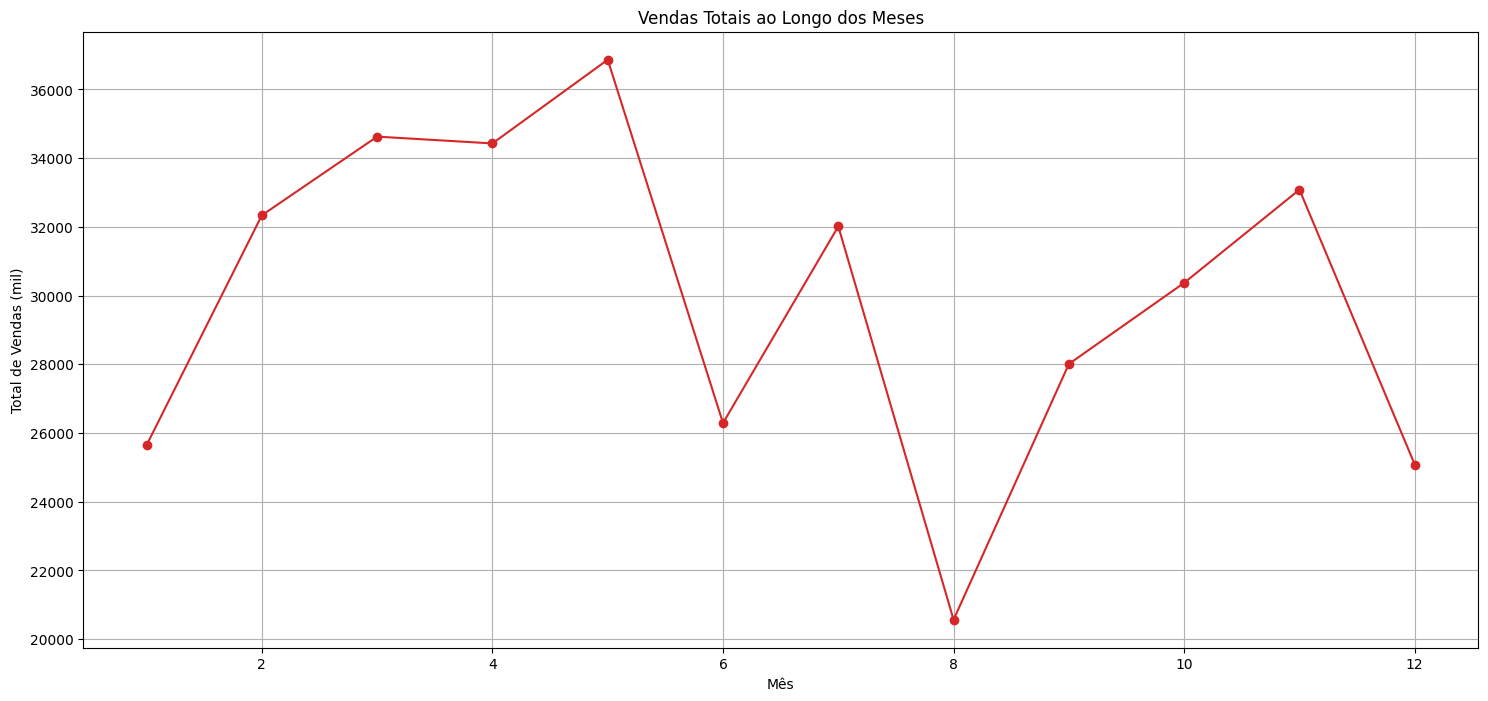

In [105]:
# DataFrame
mes = df.groupby(["Mes"])["ValorVenda"].sum()

# Tamanho do gráfico
plt.figure(figsize=(18, 8))

# Gráfico de linhas com cor definida pela função get_color
mes.plot(marker='o', color=get_color('ValorVenda'))

# Labels
plt.xlabel("Mês")
plt.ylabel("Total de Vendas (mil)")
plt.title("Vendas Totais ao Longo dos Meses")

# Grade
plt.grid(True)

# Mostrar gráfico
plt.show()

### A categoria de eletrodomésticos representa mais de 53% das vendas, mesmo com a queda nas vendas ao longo dos anos.

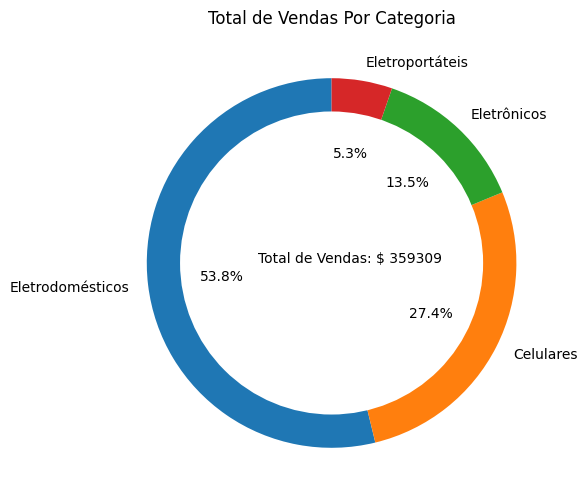

In [91]:
#Agrupando em um novo dataframe para criar um grafico e analisar as vendas totais ao longo do tempo registrado nas categorias.
rosca = df.groupby("Categoria")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False) 
# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza, labels, colocando a porcentagem nas categorias e o angulo.
plt.pie(rosca["ValorVenda"], 
        labels = rosca["Categoria"],
        autopct='%.1f%%', startangle = 90)

#Limpando o círculo central, com um espaço em branco, para criar a aparência de uma rosca.
centre_circle = plt.Circle((0, 0), 0.82, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título e subtítulo.
plt.annotate(text = "Total de Vendas: " + "$ " + str(int(sum(rosca["ValorVenda"]))), xy = (-0.40, 0))         #Esse codigo parece complicado, mas é só o subtítulo que vai aparecer no meio do gráfico com valor total de vendas e a posição.
plt.title("Total de Vendas Por Categoria")

#Mostrar gráfico.
plt.show()

### Grafico de barras, para visualizar a média de venda por produto para cada fabricante.

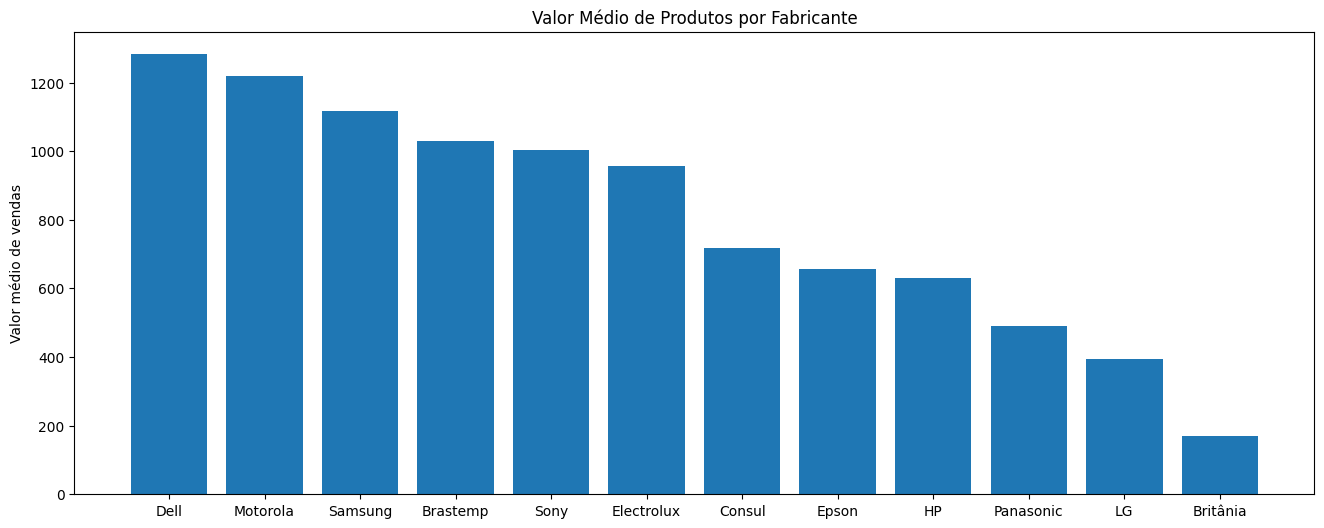

In [93]:
#Odenando um dataframe para criar um grafico de barras.
barras= df.groupby("Fabricante")["ValorVenda"].mean().reset_index().sort_values(by = "ValorVenda",  ascending = False)

#Tamanho da figura.
plt.figure(figsize = (16, 6))   

#Gráfico de barras
plt.bar(barras["Fabricante"], barras["ValorVenda"])

#Titulo y e título príncipal
plt.ylabel("Valor médio de vendas")
plt.title("Valor Médio de Produtos por Fabricante")

#Mostrar gráfico.
plt.show()

### Visualizando o total de vendas por seguimentos,

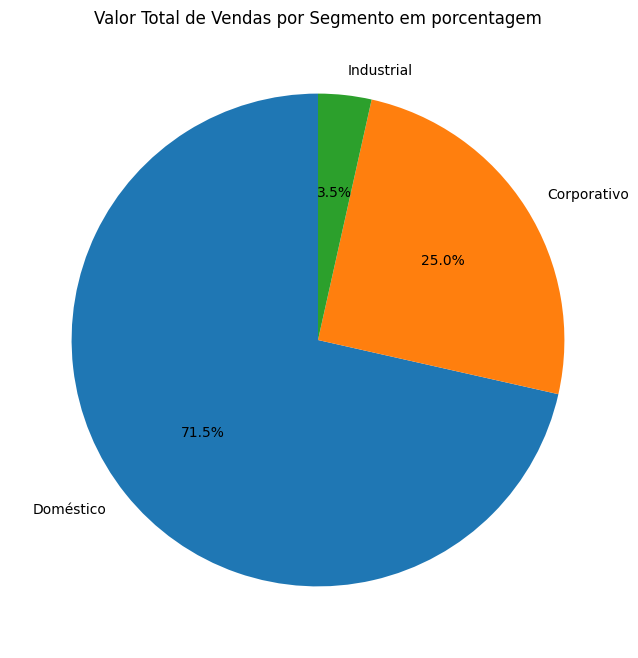

In [95]:
# criando dataframe
pizza = df.groupby("Segmento")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

#Tamanho da figura.
plt.figure(figsize = (15, 8))

#Gráfico de pizza.
plt.pie(pizza["ValorVenda"], 
        labels = pizza["Segmento"],
        autopct='%.1f%%', startangle = 90)
#Título de mostrar gráfico.
plt.title("Valor Total de Vendas por Segmento em porcentagem")
plt.show()       

### Valor de venda totais por cidade

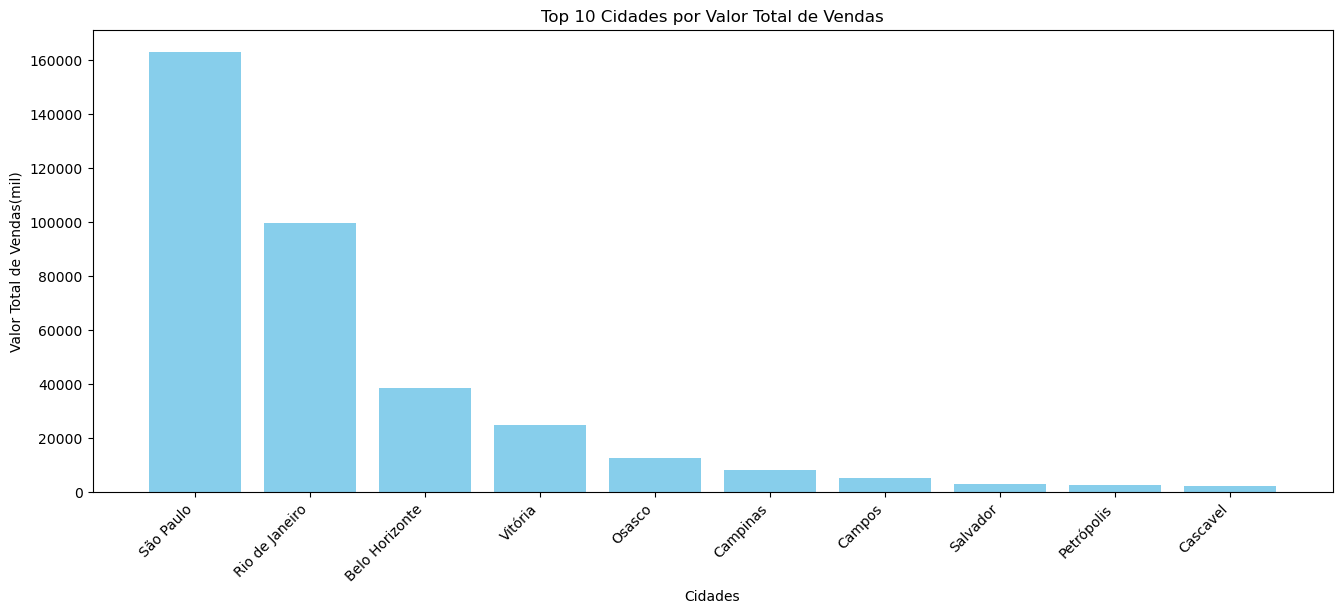

In [156]:
dfcidades=df.groupby("Cidade")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).head(10) 

#Tamanho da figura.
plt.figure(figsize=(16, 6))  # Ajusta o tamanho da figura conforme necessário

#Gráfico de barras com cor.
plt.bar(dfcidades["Cidade"], dfcidades["ValorVenda"], color='skyblue')
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos do eixo X para melhor legibilidade

#Labels e titulo
plt.xlabel("Cidades")
plt.ylabel("Valor Total de Vendas(mil)")
plt.title("Top 10 Cidades por Valor Total de Vendas")
plt.show()

# Conclusão

Em suma, a análise dos dados da empresa revelou áreas críticas que necessitam de atenção imediata para garantir sua sustentabilidade e promover um crescimento robusto. A gestão inadequada das margens de lucro e as quedas nas vendas de produtos eletrônicos e eletroportáteis destacam a urgência de reavaliações estratégicas.

A implementação de ajustes nos preços, aliada a uma análise competitiva e à reformulação das estratégias de marketing, é fundamental para restaurar a saúde financeira dos produtos. Além disso, a investigação das causas por trás da queda nas vendas em 2014 permitirá à empresa entender melhor as dinâmicas do mercado e adaptar suas abordagens de forma proativa.

Ao focar na coleta e análise de dados para informar decisões estratégicas, a empresa estará mais bem equipada para enfrentar os desafios atuais e futuros, assegurando sua competitividade e alinhamento com as tendências do mercado. Com essas medidas corretivas, a empresa poderá não apenas recuperar seu desempenho, mas também estabelecer uma base sólida para um crescimento sustentável a longo prazo.

&nbsp;

# ![Varejo](https://img.freepik.com/fotos-premium/empresario-mostrando-a-evolucao-dos-negocios-com-um-grafico_1057126-157.jpg?w=1800)